In [12]:
!pip install --upgrade --force-reinstall scikit-learn==1.0 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from tqdm.auto import tqdm

In [14]:
class Config:
    SEED = 3655
    EARLY_STOPPING = 20
    MAX_EPOCHS = 1_000

In [17]:
# X, y = load_boston(True)
X, y = load_diabetes(True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=.8, test_size=.2, random_state=Config.SEED)

## RandomForestRegressor

In [24]:
reg = RandomForestRegressor(n_estimators=Config.MAX_EPOCHS, ccp_alpha=.01, random_state=Config.SEED)

reg.fit(X_train, y_train)

train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

print(f'train rmse: {train_rmse:.3f}')
print(f'valid rmse: {valid_rmse:.3f}')

train rmse: 21.582
valid rmse: 56.770


In [ ]:
reg = RandomForestRegressor(n_estimators=1, ccp_alpha=.01, warm_start=True, n_jobs=-1, random_state=Config.SEED)

train_loss = []
valid_loss = []

for _ in tqdm(range(Config.MAX_EPOCHS - 1)):
    reg.fit(X_train, y_train)

    train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
    valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

    train_loss.append(train_rmse)
    valid_loss.append(valid_rmse)

    reg.n_estimators += 1

print(f'train rmse: {train_loss[-1]:.3f}')
print(f'valid rmse: {valid_loss[-1]:.3f}')

sns.lineplot(x=np.arange(len(train_loss)), y=train_loss, label='train loss')
sns.lineplot(x=np.arange(len(valid_loss)), y=valid_loss, label='valid loss')
plt.grid(True)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]


Best validation score is improved!! epoch 0: inf -> 77.118

Best validation score is improved!! epoch 1: 77.118 -> 64.366

Best validation score is improved!! epoch 9: 64.366 -> 62.749

Best validation score is improved!! epoch 10: 62.749 -> 61.516

Best validation score is improved!! epoch 11: 61.516 -> 60.324

Best validation score is improved!! epoch 14: 60.324 -> 60.319

Best validation score is improved!! epoch 15: 60.319 -> 60.086

Best validation score is improved!! epoch 16: 60.086 -> 59.579

Best validation score is improved!! epoch 17: 59.579 -> 59.262

Best validation score is improved!! epoch 18: 59.262 -> 59.101

Best validation score is improved!! epoch 33: 59.101 -> 58.885


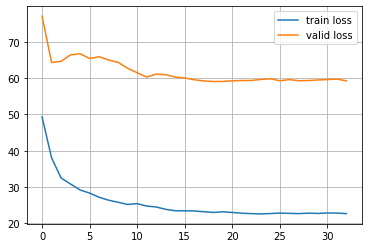

In [25]:
reg = RandomForestRegressor(n_estimators=0, ccp_alpha=.01, warm_start=True, n_jobs=-1, random_state=Config.SEED)

train_loss = []
valid_loss = []

best_valid_score = float('inf')
best_epoch = None
best_model = None
cnt = 0

for epoch in tqdm(range(Config.MAX_EPOCHS)):
    reg.n_estimators += 1
    reg.fit(X_train, y_train)

    train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
    valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

    if valid_rmse < best_valid_score:
        print(f'\nBest validation score is improved!! epoch {epoch}: {best_valid_score:.3f} -> {valid_rmse:.3f}')
        best_valid_score = valid_rmse
        best_epoch = epoch
        best_model = reg
        cnt = 0
    else:
        cnt += 1

    if cnt > Config.EARLY_STOPPING:
        reg = best_model
        break
    
    train_loss.append(train_rmse)
    valid_loss.append(valid_rmse)

sns.lineplot(x=np.arange(best_epoch), y=train_loss[:best_epoch], label='train loss')
sns.lineplot(x=np.arange(best_epoch), y=valid_loss[:best_epoch], label='valid loss')
plt.grid(True)
plt.show()

## GradientBoostingRegressor

In [21]:
reg = GradientBoostingRegressor(n_estimators=Config.MAX_EPOCHS, ccp_alpha=.01, random_state=Config.SEED)

reg.fit(X_train, y_train)

train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

print(f'train rmse: {train_rmse:.3f}')
print(f'valid rmse: {valid_rmse:.3f}')

train rmse: 2.667
valid rmse: 64.199


  0%|          | 0/1000 [00:00<?, ?it/s]

train rmse: 2.667
valid rmse: 64.199


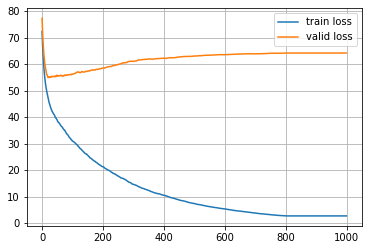

In [22]:
reg = GradientBoostingRegressor(n_estimators=0, ccp_alpha=.01, warm_start=True, random_state=Config.SEED)

train_loss = []
valid_loss = []

for _ in tqdm(range(Config.MAX_EPOCHS)):
    reg.n_estimators += 1
    reg.fit(X_train, y_train)

    train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
    valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

    train_loss.append(train_rmse)
    valid_loss.append(valid_rmse)

print(f'train rmse: {train_loss[-1]:.3f}')
print(f'valid rmse: {valid_loss[-1]:.3f}')

sns.lineplot(x=np.arange(len(train_loss)), y=train_loss, label='train loss')
sns.lineplot(x=np.arange(len(valid_loss)), y=valid_loss, label='valid loss')
plt.grid(True)
plt.show()

  0%|          | 0/999 [00:00<?, ?it/s]


Best validation score is improved!! epoch 0: inf -> 77.3377

Best validation score is improved!! epoch 1: 77.3377 -> 74.3467

Best validation score is improved!! epoch 2: 74.3467 -> 71.5471

Best validation score is improved!! epoch 3: 71.5471 -> 68.7544

Best validation score is improved!! epoch 4: 68.7544 -> 66.8966

Best validation score is improved!! epoch 5: 66.8966 -> 65.2407

Best validation score is improved!! epoch 6: 65.2407 -> 63.7470

Best validation score is improved!! epoch 7: 63.7470 -> 62.5364

Best validation score is improved!! epoch 8: 62.5364 -> 61.5091

Best validation score is improved!! epoch 9: 61.5091 -> 60.2202

Best validation score is improved!! epoch 10: 60.2202 -> 59.7070

Best validation score is improved!! epoch 11: 59.7070 -> 58.6891

Best validation score is improved!! epoch 12: 58.6891 -> 58.2360

Best validation score is improved!! epoch 13: 58.2360 -> 57.3956

Best validation score is improved!! epoch 14: 57.3956 -> 56.7454

Best validation score i

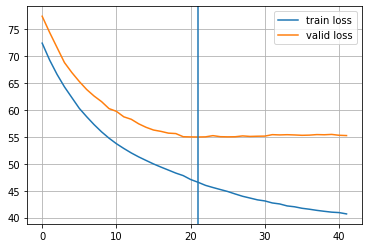

In [23]:
reg = GradientBoostingRegressor(n_estimators=0, ccp_alpha=.01, warm_start=True, random_state=Config.SEED)

train_loss = []
valid_loss = []

best_valid_score = float('inf')
best_epoch = None
best_model = None
cnt = 0

for epoch in tqdm(range(Config.MAX_EPOCHS - 1)):
    reg.n_estimators += 1
    reg.fit(X_train, y_train)

    train_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
    valid_rmse = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

    if valid_rmse < best_valid_score:
        print(f'\nBest validation score is improved!! epoch {epoch}: {best_valid_score:.4f} -> {valid_rmse:.4f}')
        best_valid_score = valid_rmse
        best_epoch = epoch
        best_model = reg
        cnt = 0
    else:
        cnt += 1

    if cnt > Config.EARLY_STOPPING:
        reg = best_model
        break
    
    train_loss.append(train_rmse)
    valid_loss.append(valid_rmse)

sns.lineplot(x=np.arange(len(train_loss)), y=train_loss, label='train loss')
sns.lineplot(x=np.arange(len(valid_loss)), y=valid_loss, label='valid loss')
plt.axvline(best_epoch, label="best_epoch")

plt.grid(True)
plt.show()